# **Library load**

In [74]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [75]:
base_path = os.getcwd()

df_train_bike = pd.read_csv(os.path.join(base_path, 'data', 'train.csv'))
df_test_bike = pd.read_csv(os.path.join(base_path, 'data', 'test.csv'))
display(df_train_bike.head(5))
display(df_test_bike.head(5))


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# **EDA**

In [76]:
print('[shape] : ', df_train_bike.shape)
print('[info]')
df_train_bike.info()

[shape] :  (10886, 12)
[info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [77]:
df_train_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [78]:
# 연/월/일/시간 분해
df_train_bike['datetime'] = df_train_bike.datetime.apply(pd.to_datetime)
df_train_bike['year'] = df_train_bike.datetime.apply(lambda x : x.year)
df_train_bike['month'] = df_train_bike.datetime.apply(lambda x : x.month)
df_train_bike['day'] = df_train_bike.datetime.apply(lambda x : x.day)
df_train_bike['hour'] = df_train_bike.datetime.apply(lambda x : x.hour )
df_train_bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [79]:
# 연/월/일/시간 분해
df_test_bike['datetime'] = df_test_bike.datetime.apply(pd.to_datetime)
df_test_bike['year'] = df_test_bike.datetime.apply(lambda x : x.year)
df_test_bike['month'] = df_test_bike.datetime.apply(lambda x : x.month)
df_test_bike['day'] = df_test_bike.datetime.apply(lambda x : x.day)
df_test_bike['hour'] = df_test_bike.datetime.apply(lambda x : x.hour )
df_test_bike.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2


| column | description |
| -- | -- |
|datetime | hourly date + timestamp  |
|season | 1 = spring <br> 2 = summer <br> 3 = fall <br> 4 = winter |
|holiday | whether the day is considered a holiday|
|workingday | whether the day is neither a weekend nor holiday|
|weather | 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
|temp | temperature in Celsius|
|atemp | "feels like" temperature in Celsius|
|humidity | relative humidity|
|windspeed | wind speed|
|casual | number of non-registered user rentals initiated|
|registered | number of registered user rentals initiated|
|count | number of total rentals|

# 

In [80]:
df_train_bike[['casual', 'registered', 'count']].corr()

,casual,registered,count
casual,1.000000,0.497250,0.690414
registered,0.497250,1.000000,0.970948
count,0.690414,0.970948,1.000000


In [81]:
drop_columns = ['datetime', 'casual', 'registered', 'day']
df_train_bike.drop(drop_columns, axis=1, inplace=True)

In [82]:
df_test_bike.drop(['datetime','day'], axis=1, inplace=True)

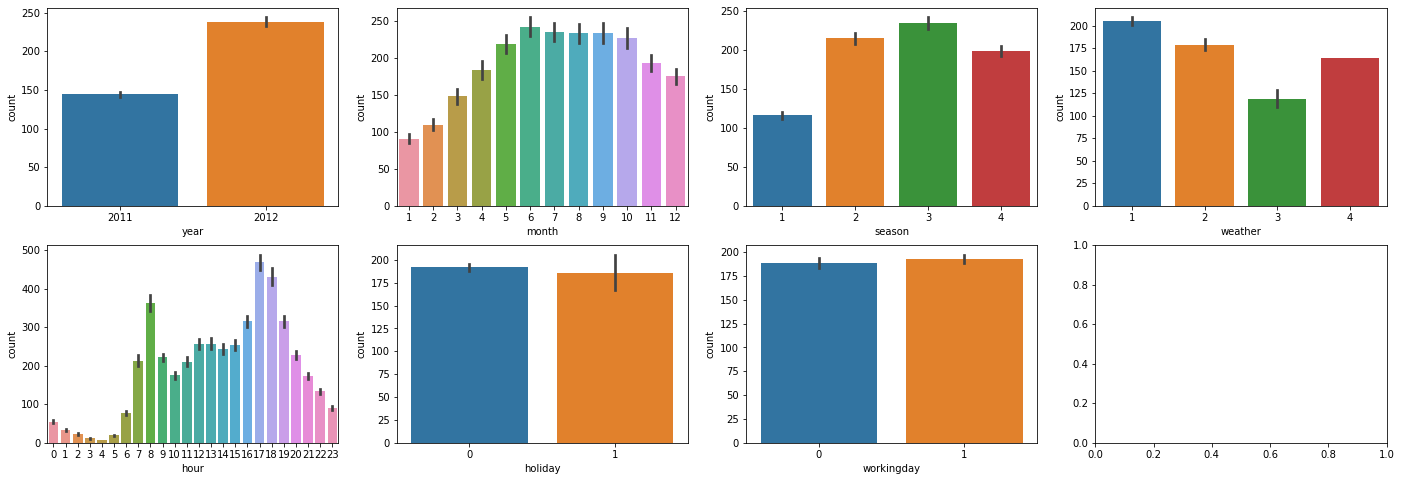

In [84]:
viz_columns = ['year', 'month', 'season', 'weather', 'hour', 'holiday', 'workingday']

fig, axes = plt.subplots(figsize=(24, 8), ncols=4, nrows=2)

for i, feature in enumerate(viz_columns) :
    row, col = i//4, i%4
    sns.barplot(x = feature, y ='count', data=df_train_bike, ax=axes[row][col])

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Root Mean Squared Log Error
def rmsle(y, pred) :
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# Root Mean  Squared Error
def rmse(y, pred) :
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE 
def evaluate_regr(y, pred) :
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3F}".format(rmsle_val, rmse_val, mae_val))

## **비교를 위한 기본 예측**

In [86]:
df_train_bike.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df_train_bike['count']
X_features = df_train_bike.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE : 1.170, RMSE : 140.892, MAE : 105.905


In [88]:
def get_top_error_data(y_test, pred, n_tops=5) :
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    display(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, 10)

,real_count,predicted_count,diff
1618,890,319.0,571.0
966,884,323.0,561.0
3151,798,241.0,557.0
412,745,193.0,552.0
2314,766,221.0,545.0
2817,856,314.0,542.0
2277,813,271.0,542.0
1003,713,171.0,542.0
454,721,180.0,541.0
2394,684,145.0,539.0


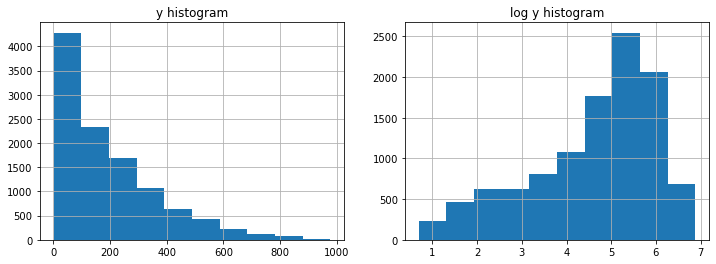

In [89]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
y_target.hist(ax=axes[0]);
axes[0].set_title('y histogram');

y_log_transform = np.log1p(y_target)
y_log_transform.hist(ax=axes[1]);
axes[1].set_title('log y histogram');

## **log 변환 후 기본 예측**

In [90]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size= 0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.751, MAE : 109.380


<AxesSubplot: >

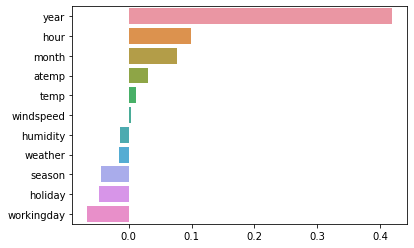

In [91]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [93]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])
X_features_ohe.head(3)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size= 0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
    print(f'[{model.__class__.__name__}]')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [lr_reg, ridge_reg, lasso_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg] :
    get_model_predict(model, X_train, X_test, y_train, y_test)

[LinearRegression]
RMSLE : 0.589, RMSE : 97.641, MAE : 63.134
[Ridge]
RMSLE : 0.590, RMSE : 98.595, MAE : 63.730
[Lasso]
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803
[RandomForestRegressor]
RMSLE : 0.354, RMSE : 50.477, MAE : 31.331
[GradientBoostingRegressor]
RMSLE : 0.343, RMSE : 55.567, MAE : 34.256


c:\Users\user\anaconda3\envs\nlpproject\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[XGBRegressor]
RMSLE : 0.349, RMSE : 52.367, MAE : 32.059
[LGBMRegressor]
RMSLE : 0.326, RMSE : 46.876, MAE : 29.093


# TEST 제출

In [96]:
X_test_ohe = pd.get_dummies(df_test_bike, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [100]:
predict_test = lgbm_reg.predict(X_test_ohe)

In [115]:
df_test_bike = pd.read_csv(os.path.join(base_path, 'data', 'test.csv'))
df_test_bike['count'] = np.expm1(predict_test)
df_submission = df_test_bike[['datetime','count']]

In [116]:
df_submission.to_csv(os.path.join(base_path, 'data', 'lgbm_1_noround.csv'), index=False)

## **Private : 0.4163, Public : 0.4163**